> 시작하기 전에

아래 참고자료를 활용하였습니다.

- [Standard Scaler 사용법 at Tensorflow](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=demian7607&logNo=222009975984)

## 데이터 업로드

Google Colab에서는 런타임 종료 시 파일이 삭제되므로, 매번 업로드하도록 구성하였다.

In [1]:
from google.colab import files

print("car_evaluation.csv 파일을 업로드해주세요.")
uploaded = files.upload()

for fn in uploaded.keys():
  print("Uploaded File '{name}'".format(name = fn))

car_evaluation.csv 파일을 업로드해주세요.


Saving car_evaluation.csv to car_evaluation.csv
Uploaded File 'car_evaluation.csv'


## 업로드한 데이터 확인

In [2]:
!head car_evaluation.csv

vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc
vhigh,vhigh,2,2,big,low,unacc
vhigh,vhigh,2,2,big,med,unacc
vhigh,vhigh,2,2,big,high,unacc
vhigh,vhigh,2,4,small,low,unacc


## 데이터 전처리

- `pandas` 라이브러리를 이용하여 CSV 파일을 읽고, LabelEncoder로 범주형 데이터를 숫자 형태의 데이터로 변환한다.
- 나눈 데이터를 각각 StandardScaler로 정규화

In [5]:
import io
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 파일 읽기 및 Label Encoder로 데이터 변환
data = pd.read_csv(io.StringIO(uploaded['car_evaluation.csv'].decode('utf-8')))

for i in data.columns:
  data[i] = LabelEncoder().fit_transform(data[i])

# 데이터 준비. 마지막 열을 레이블로 지정
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.2, random_state=42)

# 각각 나눈 데이터를 정규화
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

AttributeError: 'PCA' object has no attribute 'iloc'

## PCA 적용 및 시각화

KeyError: ''

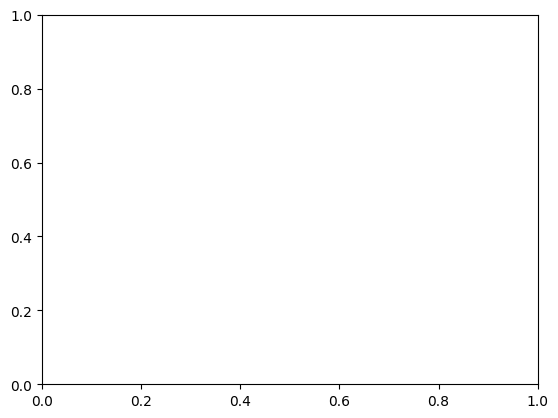

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

df = pd.DataFrame(x_train)
df.plot(kind="scatter", x="", y="")

## 모델 학습

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
rf_res = rf.predict(x_test)

rf_score = accuracy_score(y_test, rf_res)

## 결과 시각화

- **PCA 축소 결과 시각화**: 2D/3D 산점도를 통해 데이터 분포를 시각화
- **모델 성능 비교**: PCA 적용 전후의 랜덤포레스트 모델 정확도를 막대그래프로 시각화
- **주성분 기여도 분석**: 각 주성분이 데이터 분산에 기여한 비율(Explained Variance Ratio)을 막대그래프로 시각화

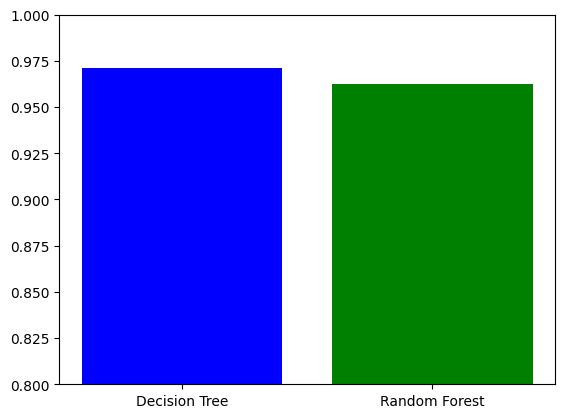

In [ ]:
import matplotlib.pyplot as plt



이를 통해 Random Forest 방식보다 단일 Decision Tree 방식이 약간 더 높은 정확도를 보인 것을 확인할 수 있다. 그러나, Random Forest가 본래 여러 트리를 모아 안정성을 높이는 기법임을 고려할 때 이는 의사결정트리가 더 훌륭한 방식이라서, 라기보다는 train data에 더 가깝게 적합되었기 때문으로 보인다.